# The Coffee Dataset

## 1. Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
coffee_domestic_consumption = pd.read_csv("/kaggle/input/coffee-dataset/Coffee_domestic_consumption.csv")
coffee_export = pd.read_csv("/kaggle/input/coffee-dataset/Coffee_export.csv")
coffee_import = pd.read_csv("/kaggle/input/coffee-dataset/Coffee_import.csv")
coffee_production = pd.read_csv("/kaggle/input/coffee-dataset/Coffee_production.csv")

In [3]:
coffee_domestic_consumption.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [4]:
zero_coffee_domestic_consumption = coffee_domestic_consumption.query("Total_domestic_consumption == 0") #Is there any 0 value?

In [5]:
zero_coffee_domestic_consumption.index # Yes there is.

Index([28, 42], dtype='int64')

In [6]:
coffee_domestic_consumption.drop(28,inplace = True) #removing one

In [7]:
coffee_domestic_consumption.drop(42 , inplace = True) # removing other

In [8]:
#There are no more 0 values! We can start.

In [9]:
# Sorting the values by the highest to the lowest
coffee_domestic_consumption.sort_values(by = "Total_domestic_consumption",ascending = False , inplace = True)

In [10]:
# Splitting the most important columns
coffee_total_consumption = coffee_domestic_consumption[["Country","Total_domestic_consumption"]]

In [11]:
coffee_total_consumption.head()

,Country,Total_domestic_consumption
2,Brazil,27824700000
5,Indonesia,4920480000
29,Ethiopia,4536540000
41,Mexico,3189660000
18,Philippines,2807280000


In [12]:
#Changing the index, to start with 1
coffee_total_consumption.index = range(coffee_total_consumption.shape[0])

In [13]:
coffee_total_consumption.index += 1

In [14]:
cdc = coffee_domestic_consumption 

In [15]:
brazil = cdc[cdc["Country"] == "Brazil"] #choosing brazil

In [16]:
brazil

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000


In [17]:
brazil_nums = brazil.select_dtypes(include = "number") #we want just the numeric values!

In [18]:
brazil_nums

,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
2,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,732000000,762000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000


In [19]:
bnv = brazil_nums.values #selecting just the values (without the columns)


In [20]:
pd.DataFrame(bnv.T) #transforming the numpyarray in a dataframe, setting the values in a vertical direction

,0
0,492000000
1,510000000
2,534000000
3,546000000
4,558000000
5,606000000
6,660000000
7,690000000
8,732000000
9,762000000


In [21]:
bnc = brazil_nums.columns #setting the columns as index

In [22]:
df = pd.DataFrame(bnv.T,index = bnc , columns = ["Valores"] ) #creating a new dataframe!
df.index.name = "Anos"

df

,Valores
Anos,
1990/91,492000000
1991/92,510000000
1992/93,534000000
1993/94,546000000
1994/95,558000000
1995/96,606000000
1996/97,660000000
1997/98,690000000
1998/99,732000000


In [23]:
df.drop("Total_domestic_consumption", axis = 0 , inplace = True) #dropping the row about the sum of the values

<Axes: title={'center': 'Coffee Consumption x Years'}, xlabel='Passing Years (1990-2020)', ylabel='Coffe Consumptions (Billions)'>

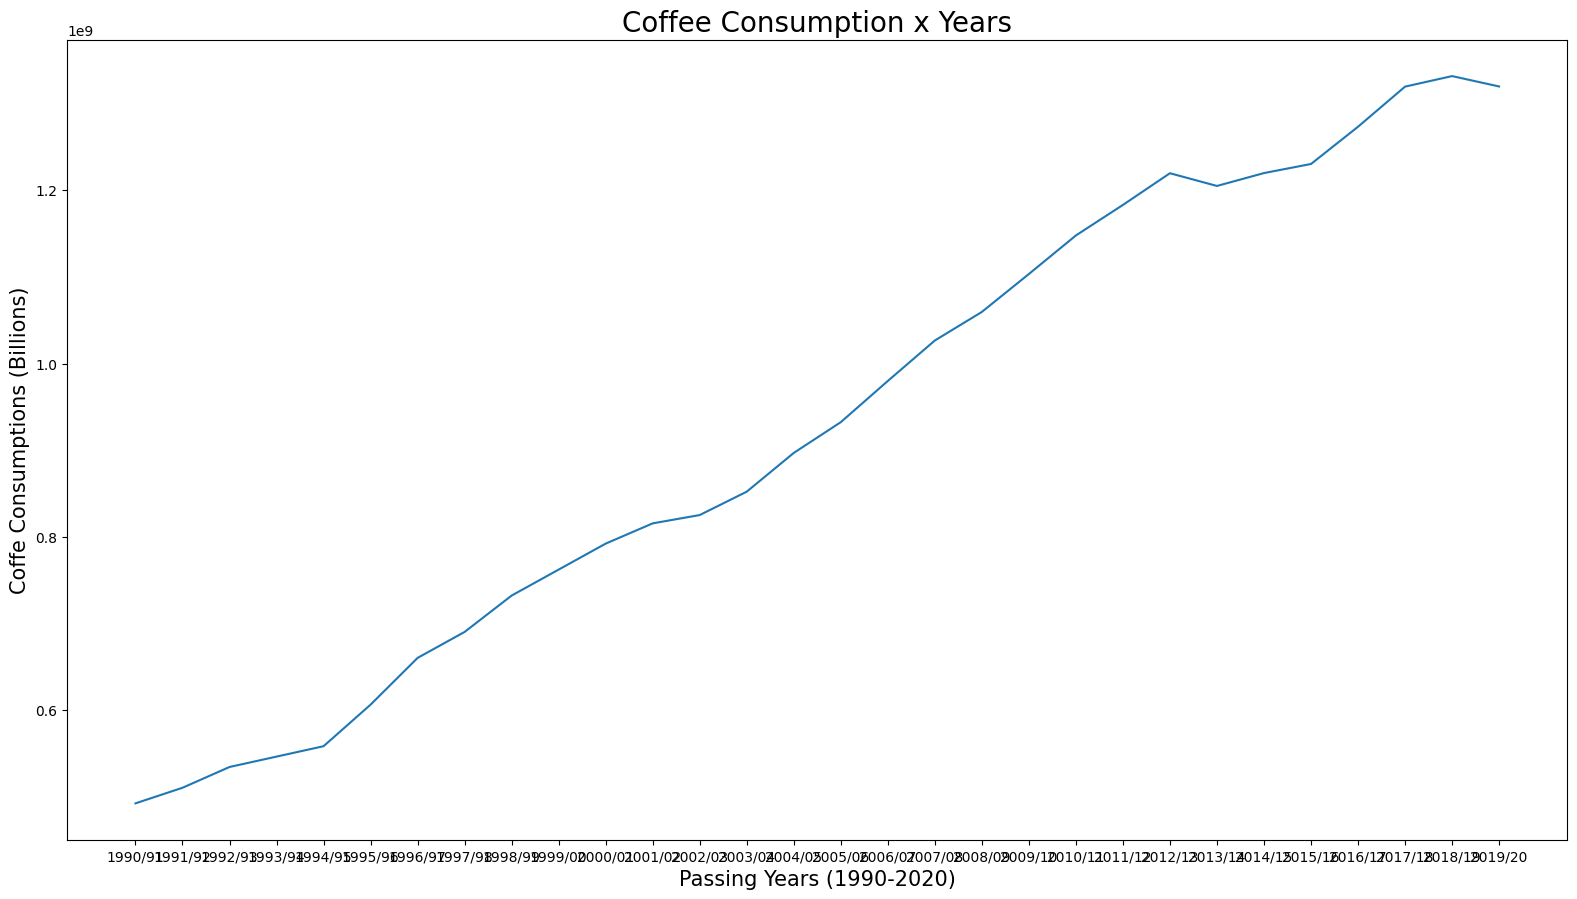

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize =( 15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df.index,df["Valores"])
eixo.set_title("Coffee Consumption x Years",fontsize= 20)
eixo.set_xlabel("Passing Years (1990-2020)",fontsize = 15)
eixo.set_ylabel("Coffe Consumptions (Billions)",fontsize = 15)
eixo

#Time to plot!

In [25]:
import plotly.express as px

fig = px.histogram(df,x=df.index , y="Valores",labels={"Valores":"Coffee Consumption","Anos":"Passing Years"})
fig

In [26]:
# We can clearly see that coffee consumption has been increasing over the years.
# But what about coffee production? It must be increasing at the same time, right?

In [27]:
####################################################################################################################################


In [28]:
coffee_production.sort_values(by="Total_production",ascending = False ,inplace = True)
cp = coffee_production 


In [29]:
cp.index = range(cp.shape[0])
cp.index += 1

In [30]:
cp.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
1,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
2,Viet Nam,Robusta/Arabica,7.860000e+07,8.628000e+07,1.404000e+08,1.812000e+08,2.179200e+08,2.382000e+08,3.451200e+08,4.187400e+08,...,1.590000e+09,1.404120e+09,1.656600e+09,1.634460e+09,1.865400e+09,1.669140e+09,2.005920e+09,1.816980e+09,1.829220e+09,2.880318e+10
3,Colombia,Arabica,8.637600e+08,1.078800e+09,8.968200e+08,6.853200e+08,7.778400e+08,7.762800e+08,6.467400e+08,7.273200e+08,...,4.591800e+08,5.956200e+08,7.274400e+08,7.999800e+08,8.405400e+08,8.780400e+08,8.294400e+08,8.319600e+08,8.460000e+08,2.159862e+10
4,Indonesia,Robusta/Arabica,4.464600e+08,5.095800e+08,3.341400e+08,4.045800e+08,3.220800e+08,2.743800e+08,4.932600e+08,4.572600e+08,...,4.133400e+08,7.842000e+08,7.740600e+08,6.567600e+08,7.551000e+08,6.924600e+08,6.511200e+08,5.770800e+08,6.859800e+08,1.540488e+10
5,Ethiopia,Arabica,1.745400e+08,1.755000e+08,1.095000e+08,1.780200e+08,1.657800e+08,1.899000e+08,2.044200e+08,1.834200e+08,...,3.390000e+08,3.679200e+08,3.745200e+08,3.829800e+08,3.909000e+08,4.285800e+08,4.408200e+08,4.506600e+08,4.405800e+08,8.669520e+09


In [31]:
brazil2 = cp[cp["Country"] == "Brazil"] #again, just BraziL!
brazil2

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
1,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10


In [32]:
brazil2= brazil2.select_dtypes(include="number") #just numbers

In [33]:
bnv2 = brazil2.values #just the values

In [34]:
bnc2 = brazil2.columns

In [35]:
df2 = pd.DataFrame(bnv2.T , index = bnc2 , columns = ["Valores"])
df2.drop("Total_production", axis = 0, inplace = True)

In [36]:
fig2 = px.histogram(df2, x =df.index , y="Valores",labels = {"x":"Passing Years","Valores":"Coffee Production"})
fig2

In [37]:
# Ok! The two variables are increasing together!
# Let's see about coffee exports

In [38]:
################################################################################################################################

In [39]:
ce = coffee_export
brazil3 = ce[ce["Country"] == "Brazil"]

In [40]:
brazil3 = brazil3.select_dtypes(include = "number")

In [41]:
bnv3 = brazil3.values

In [42]:
bnc3 = brazil3.columns

In [43]:
df3 = pd.DataFrame(bnv3.T , index = bnc2 , columns = ["Valores"])
df3.drop("Total_production", axis=0,inplace=True)
df3



,Valores
1990/91,1016160000
1991/92,1270980000
1992/93,1127460000
1993/94,1070280000
1994/95,1036380000
1995/96,868080000
1996/97,915060000
1997/98,1008060000
1998/99,1088640000
1999/00,1388940000


In [44]:
#Wait,, there are some negative values on the dataframe, let's fix this.


In [45]:
df3 = df3.abs() #the absolute values :)
df3

,Valores
1990/91,1016160000
1991/92,1270980000
1992/93,1127460000
1993/94,1070280000
1994/95,1036380000
1995/96,868080000
1996/97,915060000
1997/98,1008060000
1998/99,1088640000
1999/00,1388940000


In [46]:
df3["Percent Change"] = df3["Valores"].pct_change()*100


In [47]:
df3["Percent Change"].mean().round(2) #gBrazilian coffee exports increase by an average of 3.37% each year.

3.37

In [48]:
fig3 = px.histogram(df3, x =df3.index , y="Valores",labels ={"Valores":"Coffe Export(kg)","index":"Passing Years"})
fig3.show()

In [49]:
one = pd.concat([df["Valores"],df2["Valores"],df3["Valores"]],axis=1)
one.columns = ["Consumption","Production","Export"]

In [50]:
#Creating a new DataFrame,setting  our different values at the same index!

In [51]:
one

,Consumption,Production,Export
1990/91,492000000,1.637160e+09,1016160000
1991/92,510000000,1.637580e+09,1270980000
1992/93,534000000,2.076180e+09,1127460000
1993/94,546000000,1.690020e+09,1070280000
1994/95,558000000,1.691520e+09,1036380000
1995/96,606000000,1.083600e+09,868080000
1996/97,660000000,1.751820e+09,915060000
1997/98,690000000,1.568880e+09,1008060000
1998/99,732000000,2.205660e+09,1088640000
1999/00,762000000,2.854680e+09,1388940000


In [52]:
################################################################################################################################

In [53]:
#So far, we have noticed that there are significant values related to the coffee industry in Brazil, but who buys the most? 
#Let's see

In [54]:
coffee_import.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000
2,Belgium/Luxembourg,120900000,104760000,109680000,123780000,135720000,144060000,151560000,152640000,214800000,...,0,0,0,0,0,0,0,0,0,1257900000
3,Bulgaria,16080000,12000000,10920000,23820000,27780000,30900000,16320000,17640000,20520000,...,28920000,33600000,36540000,37260000,40920000,46740000,42420000,44220000,47100000,830700000
4,Croatia,0,0,10080000,9780000,11580000,19200000,19320000,23100000,20340000,...,23460000,23040000,24780000,25200000,26220000,28740000,26340000,26760000,27960000,622080000


In [55]:
ci = coffee_import

In [56]:
ci = ci.sort_values(by="Total_import",ascending = False)

ci.index = range(ci.shape[0])
ci.index += 1

# It's important to note that the total value of imports is not solely from Brazilian exports; there are exports from other countries as well

In [57]:
ci #Of course is the USA!

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
1,United States of America,1260420000,1190400000,1376340000,1159740000,970260000,1026420000,1166700000,1220580000,1261800000,...,1565580000,1563360000,1620960000,1653900000,1662480000,1730280000,1769280000,1735080000,1851240000,42507660000
2,Germany,820260000,793740000,827340000,846420000,814980000,771120000,810420000,834300000,824400000,...,1255560000,1308960000,1270440000,1324680000,1278960000,1342080000,1305900000,1328820000,1345920000,31481400000
3,Italy,314520000,277800000,275700000,335640000,333240000,323280000,336480000,344580000,353340000,...,501300000,521460000,529380000,561000000,559680000,613440000,601200000,638340000,654840000,13272120000
4,Japan,319800000,330600000,319560000,341460000,373020000,329340000,359640000,355260000,361620000,...,452640000,421500000,502860000,459420000,483780000,481560000,458820000,452400000,482400000,12422760000
5,France,378060000,393180000,396720000,380040000,382140000,372840000,399600000,402240000,394560000,...,419520000,410460000,402780000,426720000,408540000,404280000,418020000,457440000,479580000,11972520000
6,Spain,183180000,178200000,204840000,168780000,181680000,188760000,210900000,226620000,223080000,...,289260000,305640000,308220000,324360000,325740000,339600000,324840000,340380000,359040000,7840620000
7,United Kingdom,173880000,168360000,185280000,191820000,207960000,168420000,174180000,175740000,188520000,...,250980000,247560000,252360000,259140000,293700000,303120000,299340000,341280000,333240000,6731460000
8,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000
9,Netherlands,187680000,187260000,192300000,168240000,168000000,174600000,185040000,175440000,171720000,...,160680000,163800000,204420000,240960000,250560000,286860000,304080000,331200000,321240000,5951400000
10,Russian Federation,0,0,82920000,107700000,103560000,103680000,67680000,131100000,103920000,...,253080000,250500000,264600000,284820000,282600000,313980000,328080000,317280000,355020000,5731080000


In [58]:
usaimport = ci[ci["Country"]=="United States of America"] #splitting just the usa imports

In [59]:
usaimport = usaimport.select_dtypes(include = "number") #just numbers

In [60]:
usav = usaimport.values
usav #just the values

array([[ 1260420000,  1190400000,  1376340000,  1159740000,   970260000,
         1026420000,  1166700000,  1220580000,  1261800000,  1364760000,
         1426020000,  1284900000,  1298340000,  1365600000,  1391040000,
         1382520000,  1422540000,  1453140000,  1456620000,  1414680000,
         1462680000,  1565580000,  1563360000,  1620960000,  1653900000,
         1662480000,  1730280000,  1769280000,  1735080000,  1851240000,
        42507660000]])

In [61]:
usac = usaimport.columns
usac

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'Total_import'],
      dtype='object')

In [62]:
df4 = pd.DataFrame(usav.T,index=bnc2,columns=["Valores"])

In [63]:
two = pd.concat([df["Valores"],df2["Valores"],df3["Valores"],df4["Valores"]],axis=1)
two.columns= ["Consumption","Production","Export","USA Import"]

In [64]:
two

,Consumption,Production,Export,USA Import
1990/91,4.920000e+08,1.637160e+09,1.016160e+09,1260420000
1991/92,5.100000e+08,1.637580e+09,1.270980e+09,1190400000
1992/93,5.340000e+08,2.076180e+09,1.127460e+09,1376340000
1993/94,5.460000e+08,1.690020e+09,1.070280e+09,1159740000
1994/95,5.580000e+08,1.691520e+09,1.036380e+09,970260000
1995/96,6.060000e+08,1.083600e+09,8.680800e+08,1026420000
1996/97,6.600000e+08,1.751820e+09,9.150600e+08,1166700000
1997/98,6.900000e+08,1.568880e+09,1.008060e+09,1220580000
1998/99,7.320000e+08,2.205660e+09,1.088640e+09,1261800000
1999/00,7.620000e+08,2.854680e+09,1.388940e+09,1364760000


In [65]:
#Thinking about it, it doesn't make much sense to compare domestic consumption with imports, does it?

In [66]:
two.drop("Consumption",axis = 1,inplace = True)  #Let's drop it

In [67]:
two.drop("Total_production",axis = 0,inplace = True) #Removing an irrelevant variable

In [68]:
two

,Production,Export,USA Import
1990/91,1.637160e+09,1.016160e+09,1260420000
1991/92,1.637580e+09,1.270980e+09,1190400000
1992/93,2.076180e+09,1.127460e+09,1376340000
1993/94,1.690020e+09,1.070280e+09,1159740000
1994/95,1.691520e+09,1.036380e+09,970260000
1995/96,1.083600e+09,8.680800e+08,1026420000
1996/97,1.751820e+09,9.150600e+08,1166700000
1997/98,1.568880e+09,1.008060e+09,1220580000
1998/99,2.205660e+09,1.088640e+09,1261800000
1999/00,2.854680e+09,1.388940e+09,1364760000


In [69]:
two.corr() #Let's see if there is any correlation between the values

,Production,Export,USA Import
Production,1.000000,0.890513,0.861264
Export,0.890513,1.000000,0.871198
USA Import,0.861264,0.871198,1.000000


In [70]:
#There is a nice correlation between production/export and USA imports.


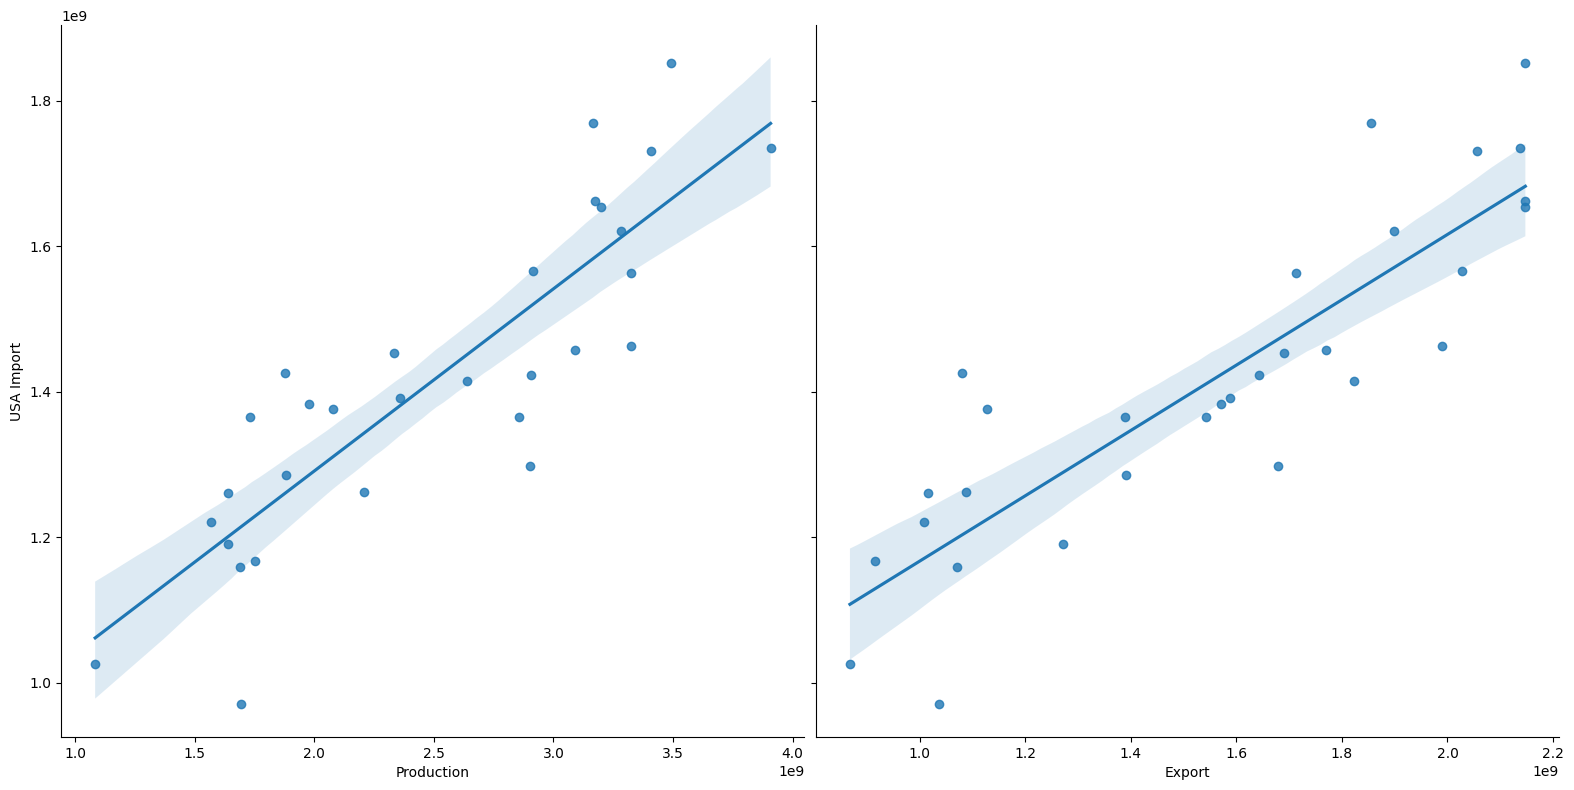

In [71]:
#Let's see that in a graph

import seaborn as sns
ax = sns.pairplot(two,x_vars = ["Production","Export"],y_vars="USA Import",kind="reg",height = 8)

In [72]:
#Both of them seem to have a linear crescent relation.
#Let's build a model.

# 2. Linear Regression

In [73]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [74]:
y = two["USA Import"] # Creating a series for the dependent variable.

In [75]:
X = two[["Production","Export"]]#Creating a dataframe for the explanatory variables.

In [76]:
#Splitting in train and test data through the method train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 2811)


In [77]:
model = LinearRegression()

In [78]:
model.fit(X_train,y_train) #training 


LinearRegression()

In [79]:
model.score(X_train,y_train).round(3) #checking the model fit

0.813

### Remeber : It's important to note that the total value of imports is not solely from Brazilian exports; there are exports from other countries as well, we want to see the Brazillian part of that!

In [80]:
#Creating an interactive simulator for the predictions


def format_number(num):
    abs_num = abs(num)
    if abs_num >= 1_000_000_000:
        formatted_number = f'{num/1_000_000_000:.2f} billion'
    elif abs_num >= 1_000_000:
        formatted_number = f'{num/1_000_000:.2f} million'
    elif abs_num >= 1_000:
        formatted_number = f'{num/1_000:.2f} thoousand'
    else:
        formatted_number = f'{num}'
    
    return formatted_number



production = float(input("Enter in billions the amount of coffee production in Brazil:"))
production = production*10**9

export = float(input("Enter in billions the amount of coffee exportation from Brazil:"))
export = export*10**9


aux = [[production,export]]
aux = pd.DataFrame(aux, columns = ["Production","Export"])

qty_import= model.predict(aux)[0]
qty_import = format_number(qty_import)

print(f"The quantity of coffee importation by the USA will be: {qty_import} kg ")




StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [ ]:
import ipywidgets as widgets
from IPython.display import display



def format_number(num):
    abs_num = abs(num)
    if abs_num >= 1_000_000_000:
        formatted_number = f'{num/1_000_000_000:.2f} billion'
    elif abs_num >= 1_000_000:
        formatted_number = f'{num/1_000_000:.2f} million'
    elif abs_num >= 1_000:
        formatted_number = f'{num/1_000:.2f} thousand'
    else:
        formatted_number = f'{num}'
    
    return formatted_number

input_production = widgets.FloatText(description='Production (billion):',layout=widgets.Layout(margin='0 0 0 0'))
input_export = widgets.FloatText(description='Export (billion):',layout=widgets.Layout(margin='0 0 0 0px'))

button_calculate = widgets.Button(description='Calculate')

label_result = widgets.Label()

def calculate(aux):
    production = input_production.value
    production = production*10**9

    export = input_export.value
    export = export*10**9

    aux = [[production,export]]
    aux = pd.DataFrame(aux, columns = ["Production","Export"])

    qty_import = model.predict(aux)[0]
    qty_import = format_number(qty_import)
    
    label_result.value = (f"The quantity of coffee coffee imports by the USA will be: {qty_import} kg ")
    
    return qty_import
    
button_calculate.on_click(calculate)


display(widgets.VBox([input_production, input_export, button_calculate, label_result]))

In [ ]:
    ##########################

In [ ]:
intercept = model.intercept_ #USA importation when no  Brazillian coffee export and no coffee production


In [ ]:
X.columns

In [ ]:
coef = model.coef_

In [ ]:
import numpy as np
index = ["Intecept","Production","Export"]
array = np.append(intercept,coef).round(2)

df5 = pd.DataFrame(array,index=index,columns = ["Parameters"])
df5

In [ ]:
df5['Parameters'] = df5['Parameters'].map('{:.2f}'.format) #only two decimal cases

In [ ]:
df5

In [ ]:
print(f"When Brazillian coffee export = 0 and  coffee production = 0 , the USA  coffee import is {format_number(intercept)} kg ")
print(f"With a 1% increase in Brazilian coffee production, there is a 0.06% increase in USA coffee imports.")
print(f"With a 1% increase in Brazilian coffee exports, there is a 0.49% increase in USA coffee imports.")



In [ ]:
#There is a positive correlation between Brazilian coffee supply and US demand.